# Sign Language Image Classification with Vision Transformers

In [ ]:
# import sys
# sys.path.append("/home/studio-lab-user/projects/sign-language-image-detection")

In [1]:
 # for google colaab setup
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:

%cd /content/drive/MyDrive/projects/sign-language-image-detection
!pip install virtualenv
!pip install -r requirements.txt
!python -m ipykernel install --user --name=sl_detection --display-name "SL Detection"


/content/drive/MyDrive/projects/sign-language-image-detection
Installed kernelspec sl_detection in /root/.local/share/jupyter/kernels/sl_detection


In [5]:
%cd /content/drive/MyDrive/projects/sign-language-image-detection


!kaggle datasets download -d ahmedkhanak1995/sign-language-gesture-images-dataset

/content/drive/MyDrive/projects/sign-language-image-detection
Dataset URL: https://www.kaggle.com/datasets/ahmedkhanak1995/sign-language-gesture-images-dataset
License(s): EU ODP Legal Notice
 95% 182M/191M [00:02<00:00, 90.0MB/s]
100% 191M/191M [00:02<00:00, 80.0MB/s]


In [7]:
!mkdir -p ./sign_datasets/sign-language-gesture-images-dataset

!unzip -oq sign-language-gesture-images-dataset.zip -d ./sign_datasets/sign-language-gesture-images-dataset


In [4]:
# Install required libraries for ViT and other dependencies
!pip install seaborn
!pip install transformers
!pip install tensorflow
!pip install datasets
!pip install matplotlib
!pip install Pillow
!pip install numpy
!pip install tensorflow-hub
!pip install scikit-learn
!pip install tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

## Import necessary packages

In [12]:
# Importing necessary libraries
import sys
import os
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix, precision_recall_curve
from transformers import ViTForImageClassification, ViTFeatureExtractor, DeiTForImageClassification, DeiTFeatureExtractor

## Load dataset

In [14]:
from PIL import Image

# Load an image to check thaat the dataset is downloaded correctly
# img = Image.open("/home/studio-lab-user/projects/sign-language-image-detection/sign_datasets/sign-language-gesture-images-dataset/Gesture Image Data/A/993.jpg")
img = Image.open("/content/drive/MyDrive/projects/sign-language-image-detection/sign_datasets/sign-language-gesture-images-dataset/Gesture Image Data/A/993.jpg")

# Print the image dimensions (width, height)
print(f'Image dimensions: {img.size}')


Image dimensions: (50, 50)


### Dataset Preprocessing  for Vision Transformer (ViT) Model

### **Load Dataset**
   - The dataset is loaded using Keras's `image_dataset_from_directory` function.
   - Images are resized to 224x224 to match the input size of the ViT model.

### **Model and Feature Extractor Loading**:
   - The Vision Transformer model `google/vit-tiny-patch16-224-in21k` is loaded from the `transformers` library.
   - The corresponding feature extractor is also loaded to preprocess images for the model.

### **Preprocessing**:
   - A `preprocess_vit` function applies the feature extractor transformations to normalize and prepare images for the ViT model.
   - The dataset is mapped to this preprocessing function with parallelization for improved performance.

### **Dataset Splitting**:
   - The dataset is split into training (70%), validation (10%), and testing (20%) subsets.


In [ ]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/usr/lib/python3.10/getpass.

In [8]:
pip install --upgrade transformers accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1


In [9]:
!pip install git+https://github.com/huggingface/accelerate

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-64oxq8bx
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-64oxq8bx
  Resolved https://github.com/huggingface/accelerate to commit f0b030554cbcd01c5541c449e92066715f21a99e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-1.2.0.dev0-py3-none-any.whl size=336694 sha256=3be61b5ac2035e3135024d040771d997c3cf1c7f4ba1911f94e20ef31962024b
  Stored in directory: /tmp/pip-ephem-wheel-cache-r7tq5nat/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1


In [10]:
!pip install datasets transformers accelerate torch torchvision scikit-learn matplotlib wandb


In [13]:
import torch
from torch.utils.data import DataLoader
from transformers import ViTImageProcessor, ViTForImageClassification, Trainer, TrainingArguments
from datasets import load_dataset, DatasetDict
from torchvision.transforms import Compose, Normalize, RandomHorizontalFlip, RandomResizedCrop, ToTensor, Resize, CenterCrop
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score


In [15]:
dataset_path = "/content/drive/MyDrive/projects/sign-language-image-detection/sign_datasets/sign-language-gesture-images-dataset/Gesture Image Data"
# idataset_pathg = "/home/studio-lab-user/projects/sign-language-image-detection/sign_datasets/sign-language-gesture-images-dataset/Gesture Image Data")

# Assuming a custom directory structure with subfolders for each class
dataset = load_dataset('imagefolder', data_dir=dataset_path)
dataset


Resolving data files:   0%|          | 0/55500 [00:00<?, ?it/s]

Computing checksums:  43%|####3     | 24054/55500 [00:05<00:06, 4810.67it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 55500
    })
})

In [16]:
# Check the dataset structure
print("Dataset structure:", dataset)


Dataset structure: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 55500
    })
})


In [17]:

from datasets import DatasetDict
# Calculate sizes for train, validation, and test splits
train_size = int(0.7 * len(dataset['train']))  # 70% for training
val_size = int(0.1 * len(dataset['train']))    # 10% for validation
test_size = len(dataset['train']) - train_size - val_size  # Remaining for testing


In [18]:
# Verify the calculated sizes
print(f"Train size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")


Train size: 38850
Validation size: 5550
Test size: 11100


In [19]:
# Split the train set manually, making sure the ranges are correctly calculated
train_ds = dataset['train'].select(range(0, train_size))
val_ds = dataset['train'].select(range(train_size, train_size + val_size))
test_ds = dataset['train'].select(range(train_size + val_size, len(dataset['train'])))

In [20]:
# Check if splits are correct
print(f"Train split size: {len(train_ds)}")
print(f"Validation split size: {len(val_ds)}")
print(f"Test split size: {len(test_ds)}")


Train split size: 38850
Validation split size: 5550
Test split size: 11100


In [21]:
# Create the DatasetDict
dataset_splits = DatasetDict({
    "train": train_ds,
    "validation": val_ds,
    "test": test_ds
})


In [22]:
# Verify the DatasetDict
print("Dataset splits:", dataset_splits)

Dataset splits: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 38850
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 5550
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 11100
    })
})


In [23]:
from transformers import ViTImageProcessor
from torchvision.transforms import Normalize, ToTensor, Resize

# Load the pretrained ViT processor
model_name = "google/vit-base-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)

# Image normalization based on ViT model
image_mean, image_std = processor.image_mean, processor.image_std
normalize = Normalize(mean=image_mean, std=image_std)
image_size = processor.size["height"]
resize = Resize((image_size, image_size))

# Function to apply normalization without resizing or augmentation
def apply_transforms(examples):
    examples["pixel_values"] = [
        normalize(ToTensor()(resize(image.convert("RGB")))) for image in examples["image"]
    ]
    return examples

# Apply transformations to each split of the dataset
dataset_splits["train"].set_transform(apply_transforms)
dataset_splits["validation"].set_transform(apply_transforms)
dataset_splits["test"].set_transform(apply_transforms)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [24]:
print(f"Train size: {len(dataset_splits['train'])}")
print(f"Validation size: {len(dataset_splits['validation'])}")
print(f"Test size: {len(dataset_splits['test'])}")


Train size: 38850
Validation size: 5550
Test size: 11100


In [25]:
from transformers import ViTForImageClassification

# Map label IDs to labels
id2label = {id: label for id, label in enumerate(train_ds.features["label"].names)}
label2id = {label: id for id, label in id2label.items()}

# Load the pre-trained ViT model
model = ViTForImageClassification.from_pretrained(
    model_name,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([37]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([37, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
import torch
from torch.utils.data import DataLoader

# Custom collate function for batching
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

# Set up DataLoader for training and validation
train_dl = DataLoader(train_ds, collate_fn=collate_fn, batch_size=64)
val_dl = DataLoader(val_ds, collate_fn=collate_fn, batch_size=64)


In [ ]:
def compute_metrics(p):
    # Get the predictions and true labels
    preds = np.argmax(p.predictions, axis=-1)
    labels = p.label_ids

    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)

    return {"accuracy": accuracy}

In [27]:
from transformers import TrainingArguments

train_args = TrainingArguments(
    output_dir="output-models",
    save_total_limit=2,
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",       # Save the model at the end of each epoch
    learning_rate=1e-3,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=2,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_dir="logs",
    remove_unused_columns=False,
    report_to="none",  # Disable W&B logging,
    local_rank=-1       # Disable distributed training (important for CPU usage)
)



/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=train_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    tokenizer=processor,
    compute_metrics=compute_metrics
)


<ipython-input-28-6a0ebfaa2507>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [29]:
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.458800,10.367621
2,0.031200,11.227085


TrainOutput(global_step=1216, training_loss=0.2016096253217639, metrics={'train_runtime': 3400.2217, 'train_samples_per_second': 22.851, 'train_steps_per_second': 0.358, 'total_flos': 6.023016384227942e+18, 'train_loss': 0.2016096253217639, 'epoch': 2.0})

## Evaluation on test set

In [32]:
# Evaluate the model on the test set
# After training, evaluate the model on the test set
outputs = trainer.predict(test_ds)

print(outputs.metrics)


{'test_loss': 11.28568172454834, 'test_runtime': 203.9085, 'test_samples_per_second': 54.436, 'test_steps_per_second': 0.853}


In [36]:
from sklearn.metrics import accuracy_score

# Get predictions and true labels
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(axis=-1)  # Ensure this is done on the correct axis

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print all metrics including accuracy
print("Test metrics:", outputs.metrics)
print(f"Accuracy: {accuracy:.4f}")



Test metrics: {'test_loss': 11.28568172454834, 'test_runtime': 203.9085, 'test_samples_per_second': 54.436, 'test_steps_per_second': 0.853}
Accuracy: 0.0000


In [37]:
print("True labels:", y_true)
print("Predicted labels:", y_pred)


True labels: [29 29 29 ... 36 36 36]
Predicted labels: [18 23 18 ... 12 12 12]


## Visualizations and Post processing

ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (37).

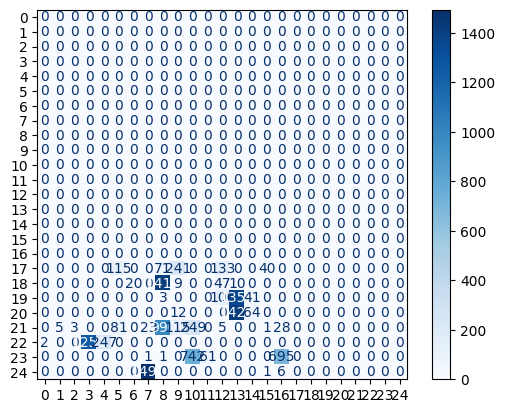

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions and true labels
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

# Get label names (Ensure that the label names match the number of classes)
labels = train_ds.features["label"].names

# Get the unique classes in the true and predicted labels
unique_labels = sorted(set(y_true) | set(y_pred))

# Update confusion matrix to use the correct number of classes
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[i] for i in unique_labels])
disp.plot(cmap='Blues')
plt.show()



In [ ]:
# Calculate the recall scores for each class
recall = recall_score(y_true, y_pred, average=None)

# Print the recall for each class
print("\nRecall Scores:")
for label, score in zip(labels, recall):
    print(f"Recall for {label}: {score:.2f}")

In [ ]:
# After training, evaluate the model on the test set
outputs = trainer.predict(dataset_splits["test"])

# Print the evaluation metrics
print(outputs.metrics)
